Загрузка kaggle.json

In [ ]:
from google.colab import files
import os
if not os.path.exists('/root/.kaggle/kaggle.json'): files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c GiveMeSomeCredit

GiveMeSomeCredit.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip -q '*.zip'

replace Data Dictionary.xls? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data = pd.read_csv('cs-training.csv', index_col=0)
test_data = pd.read_csv('cs-test.csv', index_col=0)
train_data.sample(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
146340,0,0.001333,34,0,0.059994,9500.0,7,0,0,0,2.0
105414,0,0.325252,56,0,0.517258,4200.0,12,0,2,0,1.0
133250,0,0.028008,36,0,0.271626,9490.0,10,0,2,0,0.0
63563,0,0.003305,49,0,0.370331,6666.0,8,0,2,0,1.0
45054,0,0.011718,57,0,0.071142,5242.0,8,0,0,0,0.0
123544,0,0.060327,27,0,0.562860,2600.0,2,0,1,0,0.0
100307,0,0.019940,55,0,0.241997,4185.0,4,0,1,0,0.0
86738,0,1.000000,43,0,0.000000,2250.0,1,1,0,0,0.0
117607,0,0.446620,53,1,0.180849,4500.0,15,0,0,0,0.0
98238,0,0.590730,42,0,0.289392,8700.0,7,0,2,0,0.0


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtypes: fl

Колонки:
* `SeriousDlqin2yrs` — серьёзный просрок за 2 года (таргет)
* `RevolvingUtilizationOfUnsecuredLines` — коэффициент использования кредитных средств
* `age` — возраст
* `DebtRatio` — долговая нагрузка (месячные выплаты / доход)
* `MonthlyIncome` — доход
* `NumberOfOpenCreditLinesAndLoans` — активные кредитные линии (количество)
* `NumberOfTime30-59DaysPastDueNotWorse` — количество случаев, когда платёж был с просрочкой 30–59 дней
* `NumberOfTime60-89DaysPastDueNotWorse` — количество случаев, когда платёж был с просрочкой 60–89 дней
* `NumberOfTimes90DaysLate` — количество случаев, когда платёж был с просрочкой от 90 дней
* `NumberRealEstateLoansOrLines` — займы под недвижимость (количество)
* `NumberOfDependents` — число иждивенцев (количество лиц на обеспечении)


In [ ]:
train_data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [ ]:
train_data.isna().sum()

,0
SeriousDlqin2yrs,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
NumberOfTime30-59DaysPastDueNotWorse,0
DebtRatio,0
MonthlyIncome,29731
NumberOfOpenCreditLinesAndLoans,0
NumberOfTimes90DaysLate,0
NumberRealEstateLoansOrLines,0
NumberOfTime60-89DaysPastDueNotWorse,0


Заполним медианой строки с пропуском MonthlyIncome, сделаем признак `IsMonthlyIncomeMissing`

In [ ]:
median_income = train_data['MonthlyIncome'].median()

train_data['IsMonthlyIncomeMissing'] = train_data['MonthlyIncome'].isna().astype(int)
train_data['MonthlyIncome'] = train_data['MonthlyIncome'].fillna(median_income)

test_data['IsMonthlyIncomeMissing'] = test_data['MonthlyIncome'].isna().astype(int)
test_data['MonthlyIncome'] = test_data['MonthlyIncome'].fillna(median_income)

Удалим строки, где `NumberOfDependents` - NaN

In [ ]:
train_data.dropna(subset=['NumberOfDependents'], inplace=True)
test_data['NumberOfDependents'] = test_data['NumberOfDependents'].fillna(0)

In [ ]:
X = train_data.drop(columns=['SeriousDlqin2yrs'])
y = train_data['SeriousDlqin2yrs']

### Анализ данных

#### Распределение таргета

Таргет не сбалансирован

In [ ]:
train_data['SeriousDlqin2yrs'].value_counts(normalize=True)

,proportion
SeriousDlqin2yrs,
0,0.93259
1,0.06741


#### age

<Axes: xlabel='age', ylabel='Count'>

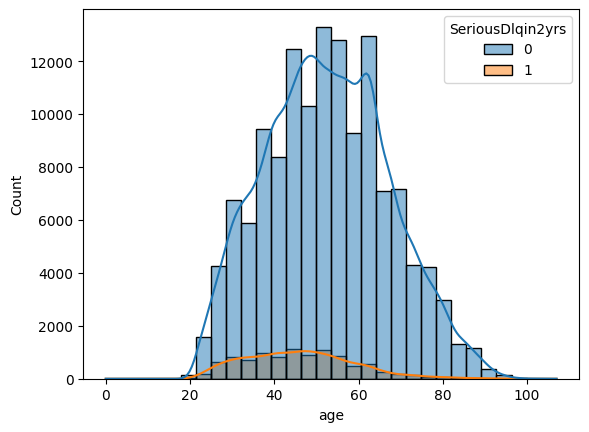

In [ ]:
sns.histplot(
    data=train_data,
    kde=True,
    bins=30,
    x = 'age',
    hue='SeriousDlqin2yrs'
    )

В основном люди возраста 40-60 лет, одобряем людям в основном 30-50 лет

#### `MontlyIncome`

<Axes: ylabel='MonthlyIncome'>

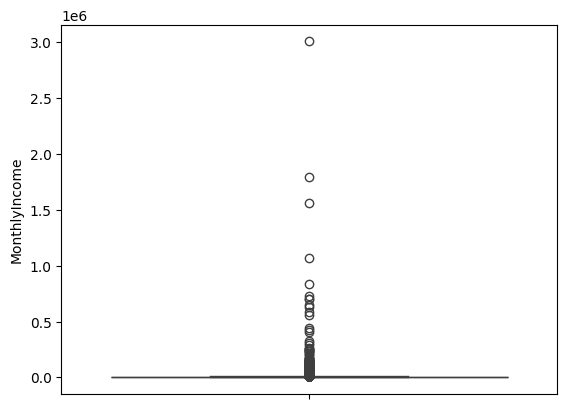

In [ ]:
sns.boxplot(train_data['MonthlyIncome'])

Большие выбросы в `MonthlyIncome`. Логарифмируем, сделаем колонку `MonthlyIncomeGreater250k`

<Axes: ylabel='LogMonthlyIncome'>

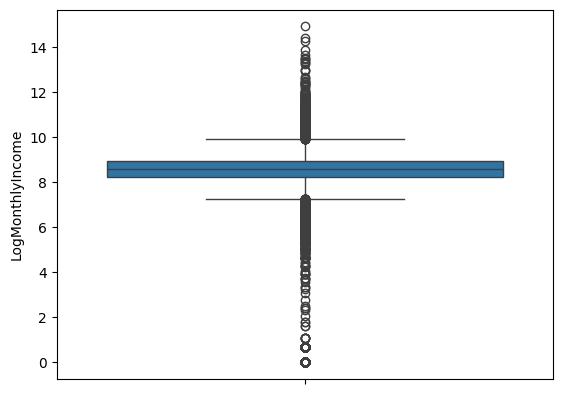

In [ ]:
train_data['LogMonthlyIncome'] = np.log1p(train_data['MonthlyIncome']) # log(1+x)
train_data['MonthlyIncomeGreater250k'] = train_data['MonthlyIncome'] > 250000
train_data.drop(columns=['MonthlyIncome'], inplace=True)

test_data['LogMonthlyIncome'] = np.log1p(test_data['MonthlyIncome'])
test_data['MonthlyIncomeGreater250k'] = test_data['MonthlyIncome'] > 250000
test_data.drop(columns=['MonthlyIncome'], inplace=True)

sns.boxplot(train_data['LogMonthlyIncome'])

#### `RevolvingUtilizationOfUnsecuredLines`

<Axes: ylabel='RevolvingUtilizationOfUnsecuredLines'>

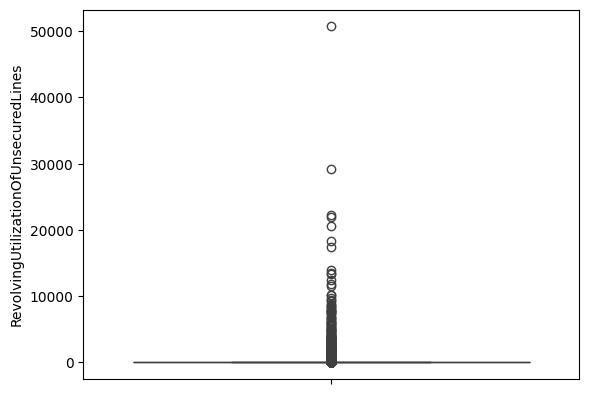

In [ ]:
sns.boxplot(train_data['RevolvingUtilizationOfUnsecuredLines'])

Также большие выбросы, сделаем колонку `RevolvingUtilizationOfUnsecuredLinesGreater2500`, и ограничим до квантиля (clipping)

<Axes: ylabel='RevolvingUtilizationOfUnsecuredLines'>

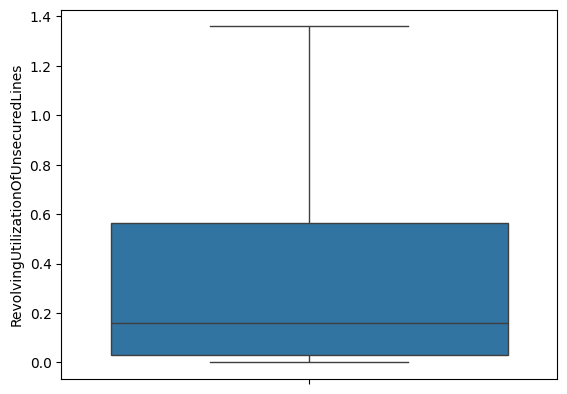

In [ ]:
q995 = train_data['RevolvingUtilizationOfUnsecuredLines'].quantile(0.995)

train_data['RevolvingUtilizationOfUnsecuredLinesGreater2500'] = train_data['RevolvingUtilizationOfUnsecuredLines'] > 2500
train_data['RevolvingUtilizationOfUnsecuredLines'] = train_data['RevolvingUtilizationOfUnsecuredLines'].clip(upper=q995)

test_data['RevolvingUtilizationOfUnsecuredLinesGreater2500'] = test_data['RevolvingUtilizationOfUnsecuredLines'] > 2500
test_data['RevolvingUtilizationOfUnsecuredLines'] = test_data['RevolvingUtilizationOfUnsecuredLines'].clip(upper=q995)

sns.boxplot(train_data['RevolvingUtilizationOfUnsecuredLines'])

<Axes: xlabel='RevolvingUtilizationOfUnsecuredLines', ylabel='Count'>

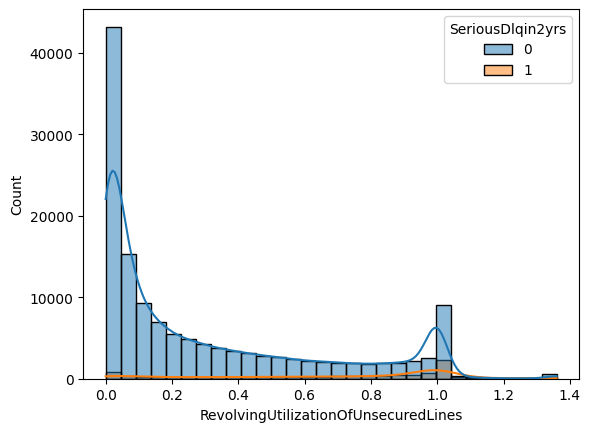

In [ ]:
sns.histplot(
    data=train_data,
    kde=True,
    bins=30,
    x = 'RevolvingUtilizationOfUnsecuredLines',
    hue='SeriousDlqin2yrs'
    )

#### `DebtRatio`

<Axes: ylabel='DebtRatio'>

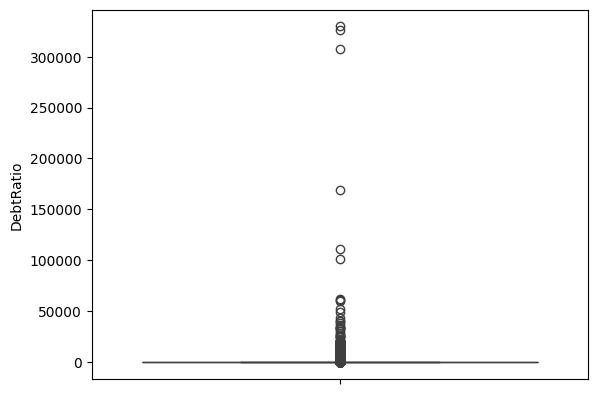

In [ ]:
sns.boxplot(train_data['DebtRatio'])

Аналогично как с `RevolvingUtilizationOfUnsecuredLines`: обрежем и сделаем колонку `DebtRatioGreater5`

<Axes: ylabel='DebtRatio'>

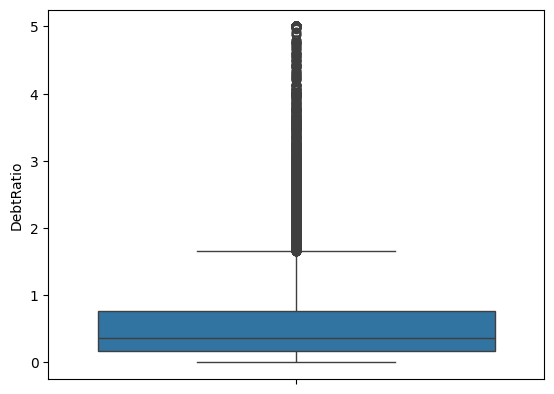

In [ ]:
train_data['DebtRatioGreater5'] = train_data['DebtRatio'] > 5
train_data['DebtRatio'] = train_data['DebtRatio'].clip(upper=5)

test_data['DebtRatioGreater5'] = test_data['DebtRatio'] > 5
test_data['DebtRatio'] = test_data['DebtRatio'].clip(upper=5)

sns.boxplot(train_data['DebtRatio'])

<Axes: xlabel='DebtRatio', ylabel='Count'>

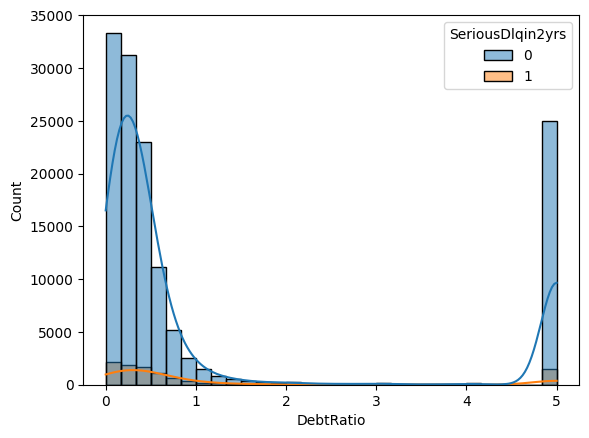

In [ ]:
sns.histplot(
    data=train_data,
    kde=True,
    bins=30,
    x = 'DebtRatio',
    hue='SeriousDlqin2yrs'
    )

#### NumberOfOpenCreditLinesAndLoans

<Axes: ylabel='NumberOfOpenCreditLinesAndLoans'>

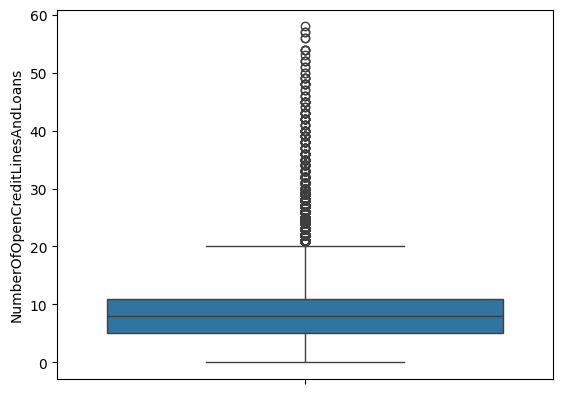

In [ ]:
sns.boxplot(train_data['NumberOfOpenCreditLinesAndLoans'])

<Axes: xlabel='NumberOfOpenCreditLinesAndLoans', ylabel='Count'>

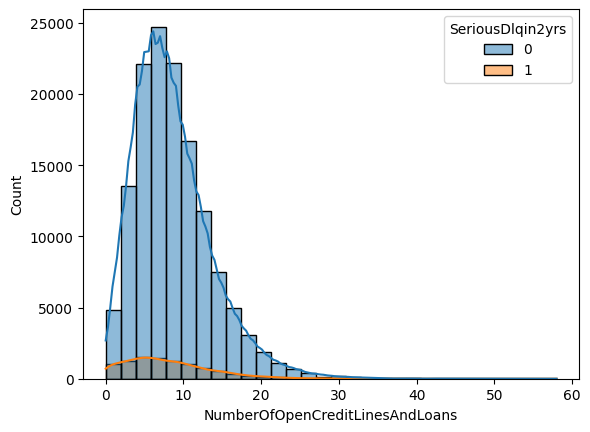

In [ ]:
sns.histplot(
    data=train_data,
    kde=True,
    bins=30,
    x = 'NumberOfOpenCreditLinesAndLoans',
    hue='SeriousDlqin2yrs'
    )

#### `NumberOfTime...DaysPastDueNotWorse`
Колонки NumberOfTime30-59DaysPastDueNotWorse, NumberOfTime60-89DaysPastDueNotWorse, NumberOfTimes90DaysLate объединим в колонки `MaxLatePaymentLevel` и `TotalNumberOfLatePayment`

In [ ]:
levels = [3,2,1]
train_data['MaxLatePaymentLevel'] = np.select([
    train_data['NumberOfTimes90DaysLate'] > 0,
    train_data['NumberOfTime60-89DaysPastDueNotWorse'] > 0,
    train_data['NumberOfTime30-59DaysPastDueNotWorse'] > 0
], levels, default=0)

test_data['MaxLatePaymentLevel'] = np.select([
    test_data['NumberOfTimes90DaysLate'] > 0,
    test_data['NumberOfTime60-89DaysPastDueNotWorse'] > 0,
    test_data['NumberOfTime30-59DaysPastDueNotWorse'] > 0
], levels, default=0)


cols=['NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTime30-59DaysPastDueNotWorse']
train_data['TotalNumberOfLatePayment'] = train_data[cols].sum(axis=1)
test_data['TotalNumberOfLatePayment'] = test_data[cols].sum(axis=1)

train_data = train_data.drop(columns=cols)
test_data = test_data.drop(columns=cols)

#### `NumberRealEstateLoansOrLines`

<Axes: ylabel='NumberRealEstateLoansOrLines'>

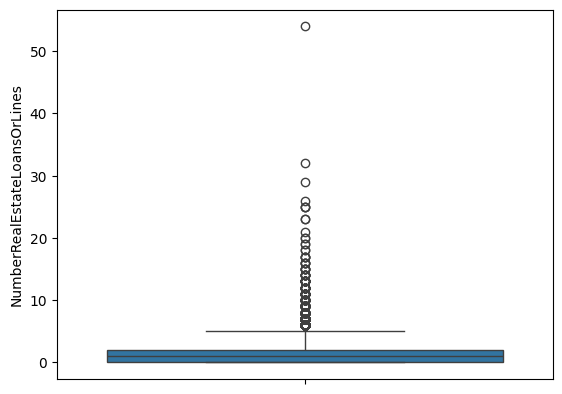

In [ ]:
sns.boxplot(train_data['NumberRealEstateLoansOrLines'])

<Axes: xlabel='NumberRealEstateLoansOrLines', ylabel='Count'>

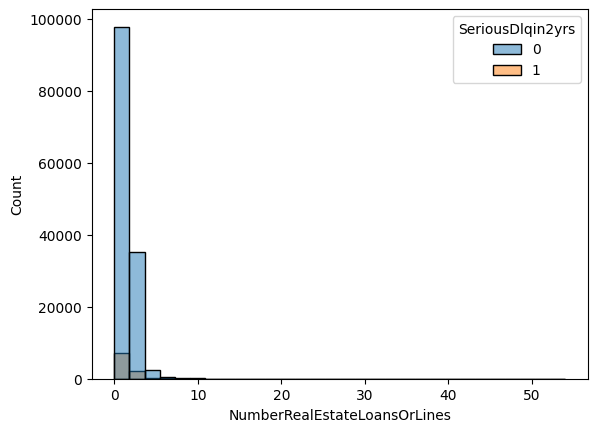

In [ ]:
sns.histplot(
    data=train_data,
    bins=30,
    x = 'NumberRealEstateLoansOrLines',
    hue='SeriousDlqin2yrs'
    )

#### `NumberOfDependents`

<Axes: ylabel='NumberOfDependents'>

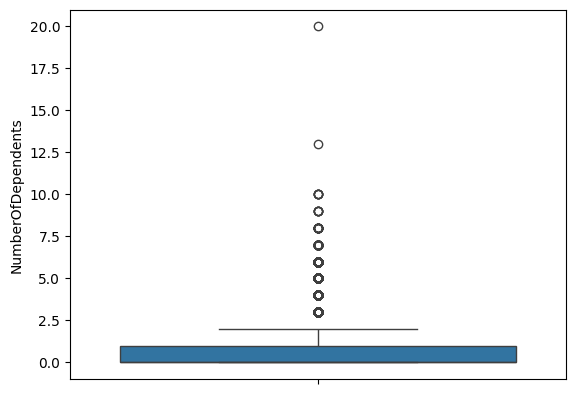

In [ ]:
sns.boxplot(train_data['NumberOfDependents'])

<Axes: xlabel='NumberOfDependents', ylabel='Count'>

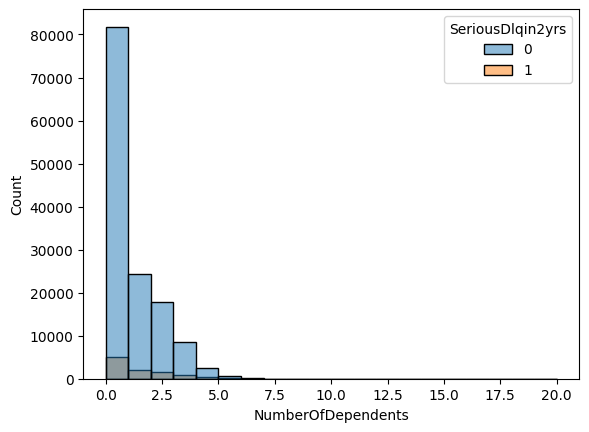

In [ ]:
sns.histplot(
    data=train_data,
    bins=20,
    x = 'NumberOfDependents',
    hue='SeriousDlqin2yrs'
    )

### Baseline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

In [ ]:
X = train_data.drop(columns=['SeriousDlqin2yrs'])
y = train_data['SeriousDlqin2yrs']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [ ]:
logreg_model = LogisticRegression(C=1, max_iter=1000,random_state=42)
logreg_model.fit(X_train_scaled, y_train)
y_pred_proba = logreg_model.predict_proba(X_val_scaled)[:,1]
roc_auc = roc_auc_score(y_val, y_pred_proba)
roc_auc

np.float64(0.8585824356938946)

roc_auc = 0.859, достойный скор для бейзлайна

### Другие модели

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

#### RandomForest

In [ ]:
param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [15, None],
    'min_samples_leaf': [10, 20]
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='roc_auc')
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_

print('best params: ', grid_search.best_params_)
print('best score: ', grid_search.best_score_)

KeyboardInterrupt: 

По итогу grid search лучшие параметры для random forest: `{'max_depth': 10, 'min_samples_leaf': 10, 'n_estimators': 200}`, score: 0.8629

In [ ]:
rf_model = RandomForestClassifier(
    random_state=42,
    **best_params,
    n_jobs=-1
)

cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, scoring='roc_auc',cv=5,n_jobs=-1)

print(f'mean roc_auc: {cv_scores.mean()}')
print(f'std roc_auc: {cv_scores.std()}')

По итогу кросс валидации получаем средний roc auc у random forest - `0.8610`  (`std=0.0026`)

#### XGBoost

In [ ]:
xgb = XGBClassifier(
    n_estimators=300,
    max_depth=15,
    random_state=42,
    learning_rate=1e-4
)
xgb.fit(X_train_scaled, y_train)

y_pred_proba = xgb.predict_proba(X_val_scaled)[:,1]
roc_auc = roc_auc_score(y_val, y_pred_proba)
roc_auc

np.float64(0.8355213538147109)

In [ ]:
param_grid = {
    'n_estimators': [400],
    'max_depth': [5, 7, 10],
    'learning_rate': [0.01, 0.05],
    'subsample': [0.8],
    'colsample_bytree': [0.8, 1.0],
    'min_child_weight': [1, 5],
    'gamma': [0]
}

xgb = XGBClassifier(eval_metric='logloss', random_state=42, n_jobs=-1)

grid_search = GridSearchCV(xgb, param_grid, cv=4, scoring='roc_auc')
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_

print('best params: ', grid_search.best_params_)
print('best score: ', grid_search.best_score_)

best params:  {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 400, 'subsample': 0.8}
best score:  0.8626687016303285


По итогу grid search лучшие параметры для xgboost: `{'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 400,'colsample_bytree': 0.8}`, score: 0.8627

In [ ]:
xgb_model = XGBClassifier(
    random_state=42,
    **best_params,
    n_jobs=-1
)

cv_scores = cross_val_score(xgb_model, X_train_scaled, y_train, scoring='roc_auc',cv=5,n_jobs=-1)

print(f'mean roc_auc: {cv_scores.mean()}')
print(f'std roc_auc: {cv_scores.std()}')

mean roc_auc: 0.8626843692127558
std roc_auc: 0.0021427201433013815


По итогу кросс валидации получаем средний roc auc у xgboost - `0.8627` (`std=0.0021`)

#### LightGBM

In [ ]:
param_grid = {
    'n_estimators': [200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [5, 7],
    'min_child_samples': [20],
    'subsample': [0.8],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0],
    'reg_lambda': [0, 1]
}

lgbm = LGBMClassifier(random_state=42)

grid = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid,
    cv=4,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_

print('best lgbm params: ', grid_search.best_params_)
print('best lgbm score: ', grid_search.best_score_)

best lgbm params:  {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 400, 'subsample': 0.8}
best lgbm score:  0.8626687016303285


По итогу grid search лучшие параметры для lgbm: `{'learning_rate': 0.01, 'max_depth': 7,'colsample_bytree': 0.8}`, score: 0.8627

In [ ]:
lgbm_model = LGBMClassifier(
    random_state=42,
    **best_params,
    n_jobs=-1
)

cv_scores = cross_val_score(lgbm_model, X_train_scaled, y_train, scoring='roc_auc',cv=5,n_jobs=-1)

print(f'mean roc_auc: {cv_scores.mean()}')
print(f'std roc_auc: {cv_scores.std()}')

mean roc_auc: 0.8629764588119315
std roc_auc: 0.002296116541354525


По итогу кросс валидации получаем средний roc auc у lgbm - `0.8630` (`std=0.0023`)

### Submission

In [ ]:
lgbm_model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Info] Number of positive: 7910, number of negative: 108950
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013258 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 116860, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067688 -> initscore=-2.622761
[LightGBM] [Info] Start training from score -2.622761


LGBMClassifier(colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=7,
               min_child_weight=1, n_estimators=400, n_jobs=-1, random_state=42,
               subsample=0.8)

In [ ]:
test_scaled = scaler.transform(test_data.drop(columns=['SeriousDlqin2yrs']))
test_pred_proba = lgbm_model.predict_proba(test_scaled)[:, 1]

submission = pd.read_csv('sampleEntry.csv')
submission['Probability'] = test_pred_proba
submission.to_csv('submission.csv', index=False)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: gamma
